In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
features = pd.read_csv('netflix_titles.csv')
history = pd.read_csv('NetflixViewingHistory.csv')

In [3]:
features.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
history.head()

,Title,Date
0,Suits: Season 4: Two in the Knees,7/19/20
1,"Suits: Season 4: Breakfast, Lunch and Dinner",7/19/20
2,Persona: Collection: Kiss Burn,7/19/20
3,Skin Decision: Before and After: Season 1: The...,7/19/20
4,My Mister: Season 1: Episode 9,7/19/20


In [5]:
#features['hk'] = np.where(features['country'].str.contains("Hong Kong"), 1, 0)

In [6]:
history["Date"] = history["Date"].astype("datetime64")

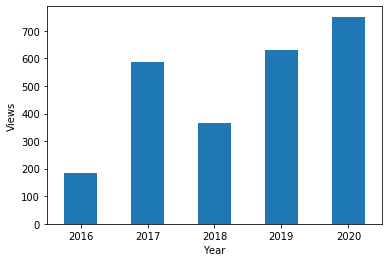

In [7]:
fig = history["Date"].groupby(history["Date"].dt.year).count().plot(kind="bar")
plt.xticks(rotation='horizontal')
plt.xlabel('Year')
plt.ylabel('Views');

In [8]:
#testing = features[features['title'].str.contains("My Mister")]
#testing

In [9]:
a = features[features['type'] == 'TV Show']['title']
a

2                                Transformers Prime
3                  Transformers: Robots in Disguise
5                                           Apaches
8                                      Fire Chasers
26                                  Castle of Stars
                           ...                     
6228                                       Kikoriki
6229                                   Red vs. Blue
6230                                          Maron
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 1969, dtype: object

In [10]:
b = features[features['title'].str.contains("Season")]['title']
b

195            Timeless Season
314                Open Season
4089    Four Seasons in Havana
5290       Season of the Witch
Name: title, dtype: object

In [11]:
contain_season = history[history['Title'].str.contains("Season")]
contain_season

,Title,Date
0,Suits: Season 4: Two in the Knees,2020-07-19
1,"Suits: Season 4: Breakfast, Lunch and Dinner",2020-07-19
3,Skin Decision: Before and After: Season 1: The...,2020-07-19
4,My Mister: Season 1: Episode 9,2020-07-19
5,My Mister: Season 1: Episode 8,2020-07-19
...,...,...
2503,House of Cards: Season 1: Chapter 1,2016-10-02
2504,Chelsea Does: Season 1: Chelsea Does Marriage,2016-10-02
2505,Marvel's Luke Cage: Season 1: Moment of Truth,2016-10-02
2507,Master of None: Season 1: Parents,2016-09-30


In [12]:
contain_season['Title'] = contain_season['Title'].str.split(':', 1).str[0].str.strip()
contain_season['Title']

0                    Suits
1                    Suits
3            Skin Decision
4                My Mister
5                My Mister
               ...        
2503        House of Cards
2504          Chelsea Does
2505    Marvel's Luke Cage
2507        Master of None
2517                Narcos
Name: Title, Length: 1637, dtype: object

In [13]:
history.loc[contain_season.index, 'Title'] = contain_season['Title']
history

,Title,Date
0,Suits,2020-07-19
1,Suits,2020-07-19
2,Persona: Collection: Kiss Burn,2020-07-19
3,Skin Decision,2020-07-19
4,My Mister,2020-07-19
...,...,...
2516,Consumed,2016-09-19
2517,Narcos,2016-09-19
2518,Accepted,2016-09-18
2519,Waffle Street,2016-09-18


In [14]:
dups = features.duplicated(['title','country','type','release_year'])
features[dups]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2124,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
5930,80233218,TV Show,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",Japan,"July 4, 2019",2019,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...


In [15]:
dups = history.duplicated(['Title'])
history[dups]

,Title,Date
1,Suits,2020-07-19
5,My Mister,2020-07-19
11,My Mister,2020-07-19
12,Suits,2020-07-18
14,Suits,2020-07-17
...,...,...
2500,Drop Dead Diva,2016-10-07
2501,Drop Dead Diva,2016-10-05
2502,Drop Dead Diva,2016-10-04
2505,Marvel's Luke Cage,2016-10-02


In [16]:
features = features.drop_duplicates(['title','country','type','release_year'])
history = history.drop_duplicates(['Title'])
history = history.reset_index(drop=True)

In [17]:
features = features[['title', 'director', 'cast', 'country', 'listed_in', 'type', 'description']]

In [18]:
features.isna().sum()

title             0
director       1968
cast            570
country         476
listed_in         0
type              0
description       0
dtype: int64

In [19]:
features.director.fillna('', inplace = True)
features.cast.fillna('', inplace = True)
features.country.fillna('', inplace = True)

In [20]:
features['info'] = features['director'] + ' ' + features['cast'] + ' ' + features['country'] + ' ' + features['listed_in'] + features['description']

In [21]:
features.head()

,title,director,cast,country,listed_in,type,description,info
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","Children & Family Movies, Comedies",Movie,Before planning an awesome wedding for his gra...,"Richard Finn, Tim Maltby Alan Marriott, Andrew..."
1,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,Stand-Up Comedy,Movie,Jandino Asporaat riffs on the challenges of ra...,Jandino Asporaat United Kingdom Stand-Up Come...
2,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,Kids' TV,TV Show,"With the help of three human allies, the Autob...","Peter Cullen, Sumalee Montano, Frank Welker, ..."
3,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,Kids' TV,TV Show,When a prison ship crash unleashes hundreds of...,"Will Friedle, Darren Criss, Constance Zimmer,..."
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,Comedies,Movie,When nerdy high schooler Dani finally attracts...,"Fernando Lebrija Nesta Cooper, Kate Walsh, Joh..."


In [22]:
features = features[['title', 'info']]

In [23]:
features.head()

,title,info
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby Alan Marriott, Andrew..."
1,Jandino: Whatever it Takes,Jandino Asporaat United Kingdom Stand-Up Come...
2,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, ..."
3,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer,..."
4,#realityhigh,"Fernando Lebrija Nesta Cooper, Kate Walsh, Joh..."


In [24]:
history

,Title,Date
0,Suits,2020-07-19
1,Persona: Collection: Kiss Burn,2020-07-19
2,Skin Decision,2020-07-19
3,My Mister,2020-07-19
4,The Players,2020-07-19
...,...,...
1149,Consumed,2016-09-19
1150,Narcos,2016-09-19
1151,Accepted,2016-09-18
1152,Waffle Street,2016-09-18


In [25]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string

In [26]:
#nltk.download('wordnet')
#nltk.download('stopwords')

In [27]:
#tokenization
stop = set(stopwords.words('english')) #a, and, is, etc.
punctuation = list(string.punctuation)
stop.update(punctuation)

In [28]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
         if i.strip().lower() not in stop: #remove spaces and convert to lower case
                word = lemmatizer.lemmatize(i.strip())
                final_text.append(word.lower())
                
    return  " ".join(final_text)

In [29]:
features['info'] = features['info'].apply(lemmatize_words)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
#vectorization (feature extraction)
tf = CountVectorizer()
X = tf.fit_transform(features['info'])  

In [32]:
cosine_sim = cosine_similarity(X)

In [33]:
#viewed_prog = set(history['Title']) & set(features['title'])

In [34]:
#features['Matched'] = np.where(history['Title'] == features['title'], 'True', 'False')

In [35]:
#features.Matched.value_counts()

In [36]:
viewed_prog = history['Title']

In [37]:
index_l = features[features['title'] == viewed_prog[1150]].index.values[0]
similar_prog = list(enumerate(cosine_sim[index_l]))
sort_prog = sorted(similar_prog , key = lambda X:X[1] , reverse = True)
sort_prog.pop(0)
sort_prog = sort_prog[:10]

In [38]:
sort_prog

[(5970, 0.26352313834736496),
 (6064, 0.2598076211353316),
 (6203, 0.2598076211353316),
 (5971, 0.25476233268253407),
 (811, 0.25197631533948484),
 (3773, 0.25074294368839944),
 (1145, 0.24743582965269678),
 (5478, 0.24077170617153845),
 (1669, 0.21808918607248967),
 (1646, 0.21759706994462233)]

In [39]:
for prog in sort_prog:
    print(features.title[prog[0]])

Drug Lords
Under Arrest
Star Trek: The Next Generation
Hatchimals | Adventures in Hatchtopia
Miniforce X
Hidden Worlds
Argon
JingleKids
Dramaworld
Something in the Rain
